### Naive bayes 

Neste notebook será realizado a aplicação do modelo de naive bayes com dois tipos de word2vec, sendo o primeiro caso utilizando o modelo word2vec feito com o corpus do projeto e a segunda análise com o word2vec pré processado CBOW 50 dimensões" do site do NILC (http://nilc.icmc.usp.br/nilc/index.php/repositorio-de-word-embeddings-do-nilc)

#### Importando as bibliotecas

In [28]:
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### Processando com o word2vec feito com o corpus

In [29]:
df_corpus = pd.read_csv('../output/word2vec_corpus.csv', index_col=0)

In [30]:
# Removendo NaN das bases para facilitar o treinamento 
df_without_NaN = df_corpus.dropna()


In [31]:
df_without_NaN

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.293259,-0.554093,-0.143469,-0.286180,-0.120456,0.068510,-0.014215,-0.079830,0.160492,-0.115068,...,-0.042688,0.236820,-0.159295,-0.010739,0.009440,0.154220,0.098202,-0.032707,-0.133130,1
['sim'],0.350237,-0.291126,-0.132905,-0.092132,0.200297,0.097566,0.131661,-0.098776,0.028257,0.027594,...,0.036275,0.229468,0.017325,-0.048554,0.240676,0.225986,0.049442,0.014348,-0.013148,0
"['queria', 'saber', 'banking', 'própria']",0.272296,-0.347116,-0.117660,-0.141904,-0.040262,0.053343,0.007840,-0.046819,0.100757,-0.031999,...,-0.023430,0.165326,-0.035452,0.019754,0.067313,0.117350,0.033811,-0.071499,-0.119191,1
"['palmas', 'palmas', 'palmas', 'palmas']",0.171647,-0.082109,-0.115455,-0.101365,0.241895,0.085117,0.094624,-0.089677,0.012293,0.122745,...,-0.030806,0.240529,0.050675,0.008870,0.261682,0.283235,-0.051489,-0.016280,-0.077243,0
"['vamos', 'ajudar', 'brasil', 'principal', 'categoria', 'automobilismo']",0.251576,-0.325886,-0.109533,-0.182638,-0.003135,0.066240,0.029114,-0.095490,0.110856,-0.040409,...,-0.024871,0.215832,-0.042172,-0.009843,0.066513,0.193243,0.036711,-0.079121,-0.108101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.253678,-0.278781,-0.109945,-0.226648,-0.081724,0.029257,0.081992,-0.085507,0.126034,-0.097043,...,0.030626,0.310788,-0.076302,-0.031371,0.019846,0.199618,0.043951,-0.035606,-0.099489,1
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.308839,-0.368129,-0.126412,-0.194175,-0.020102,0.086041,0.026710,-0.083506,0.133107,-0.046802,...,-0.009656,0.207071,-0.064957,-0.043420,0.028151,0.189932,0.048651,-0.071142,-0.117687,-1
"['atendam', 'telefone', 'amor', 'deus']",0.295115,-0.413338,-0.126926,-0.203374,-0.015113,0.085322,0.047187,-0.081903,0.154824,-0.100793,...,-0.004005,0.206795,-0.107764,-0.044219,0.032301,0.223261,0.089202,-0.065139,-0.120758,1


#### Label encoding 

O label encoding é feito para permitir com que o modelo interprete os diferentes resultados da váriavel alvo.
Nesta etapa os labels retornam o seguinte resultado : 

- POSITIVO = 2

- NEUTRO = 1

- NEGATIVO = 0

In [32]:
le = preprocessing.LabelEncoder()

In [33]:
le.fit(df_without_NaN['sentimento'])
df_without_NaN['sentimento'] = le.transform(df_without_NaN['sentimento'])

In [34]:
# Demonstrando o resultado do label encoding
df_without_NaN

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.293259,-0.554093,-0.143469,-0.286180,-0.120456,0.068510,-0.014215,-0.079830,0.160492,-0.115068,...,-0.042688,0.236820,-0.159295,-0.010739,0.009440,0.154220,0.098202,-0.032707,-0.133130,2
['sim'],0.350237,-0.291126,-0.132905,-0.092132,0.200297,0.097566,0.131661,-0.098776,0.028257,0.027594,...,0.036275,0.229468,0.017325,-0.048554,0.240676,0.225986,0.049442,0.014348,-0.013148,1
"['queria', 'saber', 'banking', 'própria']",0.272296,-0.347116,-0.117660,-0.141904,-0.040262,0.053343,0.007840,-0.046819,0.100757,-0.031999,...,-0.023430,0.165326,-0.035452,0.019754,0.067313,0.117350,0.033811,-0.071499,-0.119191,2
"['palmas', 'palmas', 'palmas', 'palmas']",0.171647,-0.082109,-0.115455,-0.101365,0.241895,0.085117,0.094624,-0.089677,0.012293,0.122745,...,-0.030806,0.240529,0.050675,0.008870,0.261682,0.283235,-0.051489,-0.016280,-0.077243,1
"['vamos', 'ajudar', 'brasil', 'principal', 'categoria', 'automobilismo']",0.251576,-0.325886,-0.109533,-0.182638,-0.003135,0.066240,0.029114,-0.095490,0.110856,-0.040409,...,-0.024871,0.215832,-0.042172,-0.009843,0.066513,0.193243,0.036711,-0.079121,-0.108101,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.253678,-0.278781,-0.109945,-0.226648,-0.081724,0.029257,0.081992,-0.085507,0.126034,-0.097043,...,0.030626,0.310788,-0.076302,-0.031371,0.019846,0.199618,0.043951,-0.035606,-0.099489,2
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.308839,-0.368129,-0.126412,-0.194175,-0.020102,0.086041,0.026710,-0.083506,0.133107,-0.046802,...,-0.009656,0.207071,-0.064957,-0.043420,0.028151,0.189932,0.048651,-0.071142,-0.117687,0
"['atendam', 'telefone', 'amor', 'deus']",0.295115,-0.413338,-0.126926,-0.203374,-0.015113,0.085322,0.047187,-0.081903,0.154824,-0.100793,...,-0.004005,0.206795,-0.107764,-0.044219,0.032301,0.223261,0.089202,-0.065139,-0.120758,2


### Separando o dataset em treino e teste

O Dataset é necessário 

In [35]:
target_corpus = df_without_NaN['sentimento']

In [36]:
features_corpus = df_without_NaN.iloc[:,0:50]


In [37]:
features_corpus

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor41,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.293259,-0.554093,-0.143469,-0.286180,-0.120456,0.068510,-0.014215,-0.079830,0.160492,-0.115068,...,0.179985,-0.042688,0.236820,-0.159295,-0.010739,0.009440,0.154220,0.098202,-0.032707,-0.133130
['sim'],0.350237,-0.291126,-0.132905,-0.092132,0.200297,0.097566,0.131661,-0.098776,0.028257,0.027594,...,0.017692,0.036275,0.229468,0.017325,-0.048554,0.240676,0.225986,0.049442,0.014348,-0.013148
"['queria', 'saber', 'banking', 'própria']",0.272296,-0.347116,-0.117660,-0.141904,-0.040262,0.053343,0.007840,-0.046819,0.100757,-0.031999,...,0.093648,-0.023430,0.165326,-0.035452,0.019754,0.067313,0.117350,0.033811,-0.071499,-0.119191
"['palmas', 'palmas', 'palmas', 'palmas']",0.171647,-0.082109,-0.115455,-0.101365,0.241895,0.085117,0.094624,-0.089677,0.012293,0.122745,...,0.090780,-0.030806,0.240529,0.050675,0.008870,0.261682,0.283235,-0.051489,-0.016280,-0.077243
"['vamos', 'ajudar', 'brasil', 'principal', 'categoria', 'automobilismo']",0.251576,-0.325886,-0.109533,-0.182638,-0.003135,0.066240,0.029114,-0.095490,0.110856,-0.040409,...,0.114520,-0.024871,0.215832,-0.042172,-0.009843,0.066513,0.193243,0.036711,-0.079121,-0.108101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.253678,-0.278781,-0.109945,-0.226648,-0.081724,0.029257,0.081992,-0.085507,0.126034,-0.097043,...,0.111765,0.030626,0.310788,-0.076302,-0.031371,0.019846,0.199618,0.043951,-0.035606,-0.099489
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.308839,-0.368129,-0.126412,-0.194175,-0.020102,0.086041,0.026710,-0.083506,0.133107,-0.046802,...,0.091146,-0.009656,0.207071,-0.064957,-0.043420,0.028151,0.189932,0.048651,-0.071142,-0.117687
"['atendam', 'telefone', 'amor', 'deus']",0.295115,-0.413338,-0.126926,-0.203374,-0.015113,0.085322,0.047187,-0.081903,0.154824,-0.100793,...,0.140638,-0.004005,0.206795,-0.107764,-0.044219,0.032301,0.223261,0.089202,-0.065139,-0.120758


In [38]:
X_train, X_test, y_train, y_test = train_test_split(features_corpus, target_corpus, test_size=0.2, random_state=42)


### Avaliação do modelo

In [39]:
# Naive Bayes

clf = GaussianNB()

# Train Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.85      0.66       387
           1       0.81      0.59      0.68       447
           2       0.35      0.22      0.27       300

    accuracy                           0.58      1134
   macro avg       0.56      0.56      0.54      1134
weighted avg       0.59      0.58      0.57      1134



In [40]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("A precisão foi de :",format_output) 

A precisão foi de : 58.29%


### Matriz de confusão

A matriz de confusão tem como objetivo, comparar as predições do modelo com o dataset real. De tal forma, nesse problema de multiclassificação é possível ter um panorama geral das respostas e se o modelo tem algum viés ou não.

In [41]:
# Criando uma matriz de confusão normalizada
confusion_matrix_corpus = metrics.confusion_matrix(y_test, Y_pred)

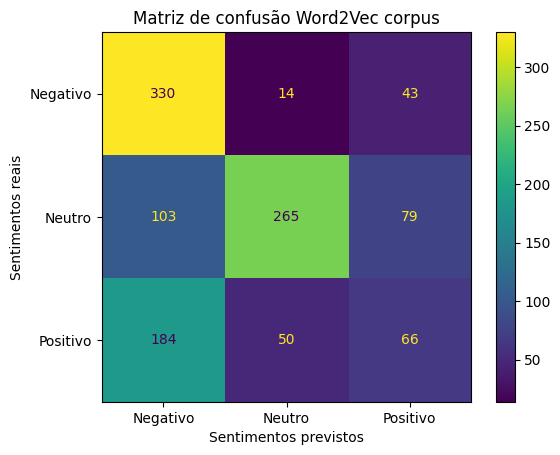

In [42]:
# Criando a matriz e definindo nomes para colunas
cm_corpus = ConfusionMatrixDisplay(confusion_matrix_corpus, display_labels=['Negativo', 'Neutro', 'Positivo'])
cm_corpus.plot()
cm_corpus.ax_.set(
                title='Matriz de confusão Word2Vec corpus', 
                xlabel='Sentimentos previstos', 
                ylabel='Sentimentos reais')
plt.show()

## Naive Bayes com o word2vec utilizando vetores pré-treinados


Nesta etapa iremos utilizar o corpus que já veio vetorizado do site da NILC. 

In [43]:
# Abrindo o dataframe 
df_cbow = pd.read_csv('../output/word2vec_cbow.csv', index_col=0)

In [44]:
# Removendo NaN das bases para facilitar o treinamento 
df_cbow_NaN = df_cbow.dropna()
df_cbow_NaN

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50,sentimento
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.194111,-0.086163,0.150576,-0.034733,-0.066786,0.122470,0.027893,0.064956,0.005728,0.135925,...,0.046650,-0.142142,0.131115,0.063196,0.025213,0.094671,-0.001749,-0.002428,0.263365,1
['sim'],0.109873,-0.062076,0.187268,-0.213734,0.046350,0.118452,-0.025577,-0.149704,0.143837,0.184814,...,0.031963,-0.051879,0.235329,-0.005905,0.000182,-0.029570,-0.064395,-0.025853,0.185357,0
"['queria', 'saber', 'banking', 'própria']",0.121342,-0.183903,0.268051,-0.031265,0.003071,0.199323,-0.008417,0.046410,0.046311,0.069435,...,0.029866,-0.076881,0.146361,0.077992,-0.022279,0.108679,-0.068519,-0.027490,0.130485,1
"['palmas', 'palmas', 'palmas', 'palmas']",0.215186,-0.092701,0.254579,-0.083714,0.099877,0.371233,0.050387,-0.127568,0.118620,0.129699,...,-0.090724,0.021903,0.221911,0.072890,0.119573,-0.004307,-0.091760,0.027266,0.144531,0
"['vamos', 'ajudar', 'brasil', 'principal', 'categoria', 'automobilismo']",0.208002,-0.119283,0.219406,-0.040021,0.008186,0.211272,0.019965,0.025391,0.058953,0.116330,...,-0.018090,-0.062190,0.159715,0.074844,0.002553,0.096084,-0.036452,0.003484,0.147662,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.156762,-0.134906,0.226852,-0.045667,0.064145,0.179836,0.001532,-0.080106,-0.059974,0.147371,...,-0.077624,0.021257,0.139206,0.068294,0.009093,0.062578,-0.032271,-0.032976,0.160159,1
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.166784,-0.125591,0.187974,-0.061618,0.001240,0.180365,0.004502,0.012454,0.067296,0.108079,...,0.006491,-0.059519,0.148439,0.087409,0.034425,0.070620,-0.056318,0.015074,0.171040,-1
"['atendam', 'telefone', 'amor', 'deus']",0.136519,-0.113854,0.161438,-0.110917,0.034236,0.139376,0.029379,-0.063767,0.037123,0.126380,...,0.000793,-0.079159,0.139690,0.086531,0.027053,0.063675,-0.031798,0.055869,0.187216,1


#### Label encoding 

O label encoding é feito para permitir com que o modelo interprete os diferentes resultados da váriavel alvo 

In [45]:
le = preprocessing.LabelEncoder()

In [46]:
le.fit(df_cbow_NaN['sentimento'])
df_cbow_NaN['sentimento'] = le.transform(df_cbow_NaN['sentimento'])

### Separando o dataset em treino e teste

In [47]:
target_cbow = df_cbow_NaN['sentimento']

In [48]:
features_cbow = df_cbow_NaN.iloc[:,0:50]
features_cbow

,Vetor1,Vetor2,Vetor3,Vetor4,Vetor5,Vetor6,Vetor7,Vetor8,Vetor9,Vetor10,...,Vetor41,Vetor42,Vetor43,Vetor44,Vetor45,Vetor46,Vetor47,Vetor48,Vetor49,Vetor50
Frase,,,,,,,,,,,,,,,,,,,,,
"['minuto', 'touro', 'ouro']",0.194111,-0.086163,0.150576,-0.034733,-0.066786,0.122470,0.027893,0.064956,0.005728,0.135925,...,-0.161490,0.046650,-0.142142,0.131115,0.063196,0.025213,0.094671,-0.001749,-0.002428,0.263365
['sim'],0.109873,-0.062076,0.187268,-0.213734,0.046350,0.118452,-0.025577,-0.149704,0.143837,0.184814,...,-0.314112,0.031963,-0.051879,0.235329,-0.005905,0.000182,-0.029570,-0.064395,-0.025853,0.185357
"['queria', 'saber', 'banking', 'própria']",0.121342,-0.183903,0.268051,-0.031265,0.003071,0.199323,-0.008417,0.046410,0.046311,0.069435,...,-0.207068,0.029866,-0.076881,0.146361,0.077992,-0.022279,0.108679,-0.068519,-0.027490,0.130485
"['palmas', 'palmas', 'palmas', 'palmas']",0.215186,-0.092701,0.254579,-0.083714,0.099877,0.371233,0.050387,-0.127568,0.118620,0.129699,...,-0.310632,-0.090724,0.021903,0.221911,0.072890,0.119573,-0.004307,-0.091760,0.027266,0.144531
"['vamos', 'ajudar', 'brasil', 'principal', 'categoria', 'automobilismo']",0.208002,-0.119283,0.219406,-0.040021,0.008186,0.211272,0.019965,0.025391,0.058953,0.116330,...,-0.277315,-0.018090,-0.062190,0.159715,0.074844,0.002553,0.096084,-0.036452,0.003484,0.147662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"['excelente', 'explicação']",0.156762,-0.134906,0.226852,-0.045667,0.064145,0.179836,0.001532,-0.080106,-0.059974,0.147371,...,-0.281259,-0.077624,0.021257,0.139206,0.068294,0.009093,0.062578,-0.032271,-0.032976,0.160159
"['porque', 'brg', 'tá', 'diminuído', 'limite', 'cartão', 'sempre', 'pagamos', 'fatura', 'dia']",0.166784,-0.125591,0.187974,-0.061618,0.001240,0.180365,0.004502,0.012454,0.067296,0.108079,...,-0.215160,0.006491,-0.059519,0.148439,0.087409,0.034425,0.070620,-0.056318,0.015074,0.171040
"['atendam', 'telefone', 'amor', 'deus']",0.136519,-0.113854,0.161438,-0.110917,0.034236,0.139376,0.029379,-0.063767,0.037123,0.126380,...,-0.187910,0.000793,-0.079159,0.139690,0.086531,0.027053,0.063675,-0.031798,0.055869,0.187216


In [49]:
X_train, X_test, y_train, y_test = train_test_split(features_cbow, target_cbow, test_size=0.2, random_state=42)


### Avaliação do modelo

In [50]:
# Naive Bayes

clf = GaussianNB()

# Treinando o modelo com os dados de teste 
clf = clf.fit(X_train,y_train.values.ravel())

# Prevendo a resposta do dataset
Y_pred = clf.predict(X_test)

print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.53      0.82      0.65       387
           1       0.78      0.60      0.67       447
           2       0.34      0.22      0.27       300

    accuracy                           0.57      1134
   macro avg       0.55      0.55      0.53      1134
weighted avg       0.58      0.57      0.56      1134



In [51]:
acc_score = accuracy_score(y_test, Y_pred)
format_output = "{:.2%}".format(acc_score)
print("A precisão foi de :",format_output) 

A precisão foi de : 57.32%


### Matriz de confusão

A matriz de confusão tem como objetivo, comparar as predições do modelo com o dataset real. De tal forma, nesse problema de multiclassificação é possível ter um panorama geral das respostas e se o modelo tem algum viés ou não.

In [52]:
# Criando uma matriz de confusão 
confusion_matrix_cbow = metrics.confusion_matrix(y_test, Y_pred)

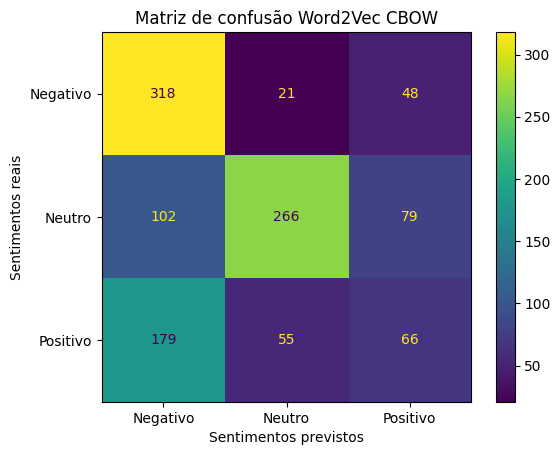

In [53]:
# Criando a matriz e definindo nomes para colunas
cm_cbow = ConfusionMatrixDisplay(confusion_matrix_cbow, display_labels=['Negativo', 'Neutro', 'Positivo'])
cm_cbow.plot()
cm_cbow.ax_.set(
                title='Matriz de confusão Word2Vec CBOW', 
                xlabel='Sentimentos previstos', 
                ylabel='Sentimentos reais')
plt.show()